## HANDWRITTEN TEXT GENERATION

### Implement a character-level recurrent neural network (RNN) to generate handwritten-like text. Train the model on a dataset of handwritten text examples, and let it generate new text based on the learned patterns.

> DataSet

* https://paperswithcode.com/dataset/deepwriting
* https://paperswithcode.com/dataset/iam
* https://paperswithcode.com/dataset/hkr

In [5]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2

import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [23]:

dir = "/Users/sharvarisoparkar/Downloads/archive(3)/train"
train_data = []
img_size = 32
non_chars = ["#", "$", "&", "@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    sub_directory = os.path.join(dir, i)
    # Add a check to ensure it's a directory
    if os.path.isdir(sub_directory):
        count = 0

        for j in os.listdir(sub_directory):
  
            count += 1
            if count > 4000:
                break
            img = cv2.imread(os.path.join(sub_directory, j), 0)
            img = cv2.resize(img, (img_size, img_size))
            train_data.append([img, i])


In [24]:

len(train_data)


140000

In [25]:
import os
import cv2

val_dir = "/Users/sharvarisoparkar/Downloads/archive(3)/Validation"
val_data = []
img_size = 32
non_chars = ["#", "$", "&", "@"]
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    sub_directory = os.path.join(val_dir, i)
    if os.path.isdir(sub_directory):
        count = 0
        for j in os.listdir(sub_directory):
            count += 1
            if count > 1000:
                break
            img = cv2.imread(os.path.join(sub_directory, j), 0)
            img = cv2.resize(img, (img_size, img_size))
            val_data.append([img, i])




In [26]:
len(val_data)

15209

In [27]:

import random 
random.shuffle(train_data)
random.shuffle(val_data)



In [28]:


train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)



In [29]:


val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)



In [30]:
from sklearn.preprocessing import LabelBinarizer
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [31]:
import numpy as np
import pandas as pd
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [32]:

val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)



In [33]:


print(train_X.shape,val_X.shape)



(140000, 32, 32, 1) (15209, 32, 32, 1)


In [34]:


print(train_Y.shape,val_Y.shape)



(140000, 35) (15209, 35)


In [35]:
import tensorflow as tf
import keras 

In [36]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))


In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 128)       

In [38]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])



In [39]:

history = model.fit(train_X,train_Y, epochs=50, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)


Epoch 1/50
4375/4375 [==============================] - 134s 30ms/step - loss: 0.6096 - accuracy: 0.8069 - val_loss: 0.3443 - val_accuracy: 0.8847
Epoch 2/50
4375/4375 [==============================] - 146s 33ms/step - loss: 0.3446 - accuracy: 0.8849 - val_loss: 0.2769 - val_accuracy: 0.9144
Epoch 3/50
1924/4375 [============>.................] - ETA: 1:29 - loss: 0.3053 - accuracy: 0.8942

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:


def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)



In [41]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

#plt.imshow(image)


In [42]:


def get_word(letter):
    word = "".join(letter)
    return word



1/1 [==============================] - 0s 28ms/step
BEWE5


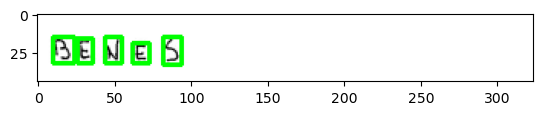

In [46]:
import imutils

letter,image = get_letters("/Users/sharvarisoparkar/Downloads/archive(5)/train_v2/train/TRAIN_00003.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

In [53]:
import openai
import openai_secret_manager
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Set up OpenAI API key
api_key = openai_secret_manager.get_secret("openai")["api_key"]
openai.api_key = api_key

def generate_handwritten_image(text):
    # Generate image using DALL-E
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=f"Generate an image of handwritten text: '{text}'",
        temperature=0.7,
        max_tokens=100,
        n=1,
        stop=None,
        temperature=0.5,
    )

    # Extract image URL from response
    image_url = response["choices"][0]["image"]

    # Download the image
    image_response = requests.get(image_url)
    image = Image.open(BytesIO(image_response.content))

    # Display the image
    plt.imshow(image)
    plt.show()

# Get user input for the word
user_word = input("Enter the word: ")

# Generate handwritten image
generate_handwritten_image(user_word)


ModuleNotFoundError: No module named 'openai.openai_secret_manager'